In [18]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

In [19]:
#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [20]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=['EIN','NAME'], inplace=True)

In [21]:
application_df['ASK_AMT_log'] = np.log(application_df['ASK_AMT'])

In [22]:
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,ASK_AMT_log
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1,8.517193
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1,11.595335
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0,8.517193
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1,8.808668
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1,11.867729


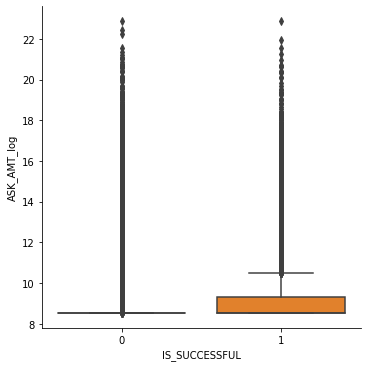

In [23]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.catplot(x="IS_SUCCESSFUL", y="ASK_AMT_log", data=application_df, kind="box")

In [24]:
application_df.describe()

,STATUS,ASK_AMT,IS_SUCCESSFUL,ASK_AMT_log
count,34299.000000,3.429900e+04,34299.000000,34299.000000
mean,0.999854,2.769199e+06,0.532406,9.412030
std,0.012073,8.713045e+07,0.498956,1.865495
min,0.000000,5.000000e+03,0.000000,8.517193
25%,1.000000,5.000000e+03,0.000000,8.517193
50%,1.000000,5.000000e+03,1.000000,8.517193
75%,1.000000,7.742000e+03,1.000000,8.954415
max,1.000000,8.597806e+09,1.000000,22.874773


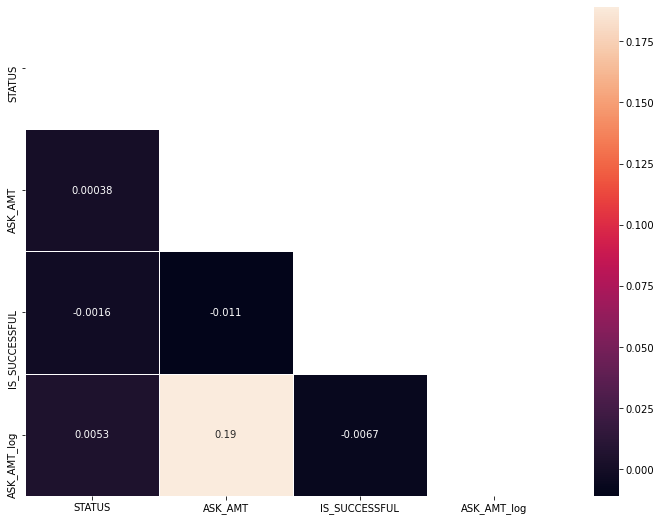

In [25]:
plt.figure(figsize=(12, 9))
matrix = np.triu(application_df.corr())
sns.heatmap(application_df.corr(), annot=True,
            linewidth=.8, mask=matrix, cmap="rocket");

In [26]:
# Drop the 'ASK_AMT' column.
application_df.drop(columns=['ASK_AMT'], inplace=True)

In [27]:
# Determine the number of unique values in each column.
application_unique = application_df.dtypes.index.tolist()
application_df[application_unique].nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
IS_SUCCESSFUL                2
ASK_AMT_log               8747
dtype: int64

In [28]:
from collections import Counter

In [29]:
Q1 = np.percentile(application_df['ASK_AMT_log'], 25)
# 3st quartile
Q3 = np.percentile(application_df['ASK_AMT_log'], 75)
# IQR
IQR = Q3 - Q1
# Outlier Step
outlier_step = IQR * 1.5
# detect outlier and their indices
outlier_list_col = application_df[(application_df['ASK_AMT_log'] < Q1 - outlier_step)| (application_df['ASK_AMT_log'] > Q3 + outlier_step)].index
outlier_list_col_ = application_df[(application_df['ASK_AMT_log'] < Q1 - outlier_step)| (application_df['ASK_AMT_log'] > Q3 + outlier_step)]
# store indeces
outlier_indices = []
outlier_indices.extend(outlier_list_col)
outlier_indices = Counter(outlier_indices)
len(outlier_indices)

7975

In [17]:
outlier_list_col_

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,IS_SUCCESSFUL,ASK_AMT_log
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,1,16.728532
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,1,17.121513
6,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,1,14.940864
7,T3,Independent,C2000,Preservation,Trust,1,10M-50M,N,1,22.840002
8,T7,Independent,C1000,ProductDev,Trust,1,1-9999,N,1,16.526331
...,...,...,...,...,...,...,...,...,...,...
34280,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,0,18.615619
34281,T3,Independent,C1000,Preservation,Trust,1,1M-5M,N,1,15.779848
34284,T3,CompanySponsored,C1000,Preservation,Association,1,1M-5M,N,0,21.690663
34289,T3,Independent,C1000,Preservation,Trust,1,25000-99999,N,1,14.301853


In [30]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df.APPLICATION_TYPE.value_counts()
application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [47]:
application_df[(application_df['IS_SUCCESSFUL']==1) & (application_df['APPLICATION_TYPE']=='T17')]

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,IS_SUCCESSFUL,ASK_AMT_log
31315,T17,Independent,C1000,ProductDev,Co-operative,1,10000-24999,N,1,13.129214
